### 得出结论

在整理过后的数据中找出问题的结论

问题:肿瘤大小与诊断结果的关系

In [1]:
#载入数据
import pandas as pd
% matplotlib inline
df = pd.read_csv('cancer_data_edited.csv')
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,19.293431,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.770000,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.250000,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.380000,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.340000,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
#创建恶性肿瘤数据集
df_m = df[df['diagnosis'] == 'M']
df_m.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,19.293431,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.770000,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.250000,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.380000,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.340000,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df_m['area'].describe()

count     210.000000
mean      976.582857
std       365.494289
min       361.600000
25%       706.850000
50%       932.000000
75%      1200.750000
max      2501.000000
Name: area, dtype: float64

In [4]:
df_b = df[df['diagnosis'] == 'B']
df_b['area'].describe()

count    354.000000
mean     462.712429
std      134.769158
min      143.500000
25%      374.975000
50%      458.150000
75%      551.550000
max      992.100000
Name: area, dtype: float64

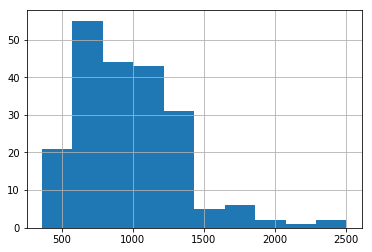

In [10]:
df_m['area'].hist();

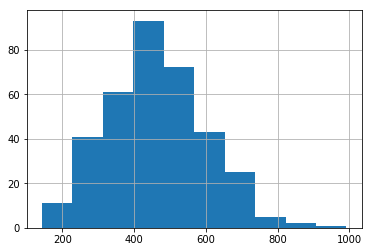

In [11]:
df_b['area'].hist();

可以看出恶性肿瘤大多数是大面积肿瘤

# 结论推导测试题
在下面的空白处探索 `store_data.csv`，回答以下测试题。

1. 哪家商店最后一个月的总销售额最高？
1. 哪家商店的平均销售额最高？
1. 哪家商店在 2016 年 3 月 13 日这个星期的销量最高？
1. 商店 C 在哪个星期销量最差？
1. 哪家商店在最近 3 个月内销量最高？

In [2]:
df_s = pd.read_csv('store_data.csv')
df_s.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [3]:
# 先探索数据,找到回答问题所需要的数据块
# 最后一个月用tail函数
df_s.tail(10)

,week,storeA,storeB,storeC,storeD,storeE
190,2017-12-24,8976,9503,6240,3882,2890
191,2017-12-31,11875,1527,6711,5265,1701
192,2018-01-07,8978,11312,4158,5019,3842
193,2018-01-14,6963,4014,4215,7153,3097
194,2018-01-21,5553,3971,3761,6255,3071
195,2018-01-28,282,6351,7759,5558,1028
196,2018-02-04,4853,6503,4187,5956,1458
197,2018-02-11,9202,3677,4540,6186,243
198,2018-02-18,3512,7511,4151,5596,3501
199,2018-02-25,7560,6904,3569,5045,2585


In [4]:
#将week装换为datetime格式
df_s['week'] = pd.to_datetime(df_s['week'])

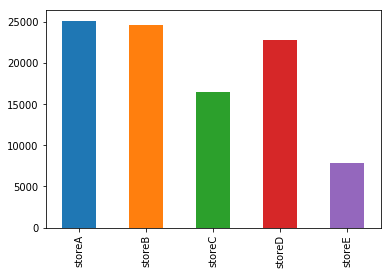

In [6]:
# 可以看到最后一个月为18年2月,绘制柱状图
df_s.iloc[196:,1:].sum().plot(kind = 'bar');
#得出结论,storeA在最后一个月销量最高

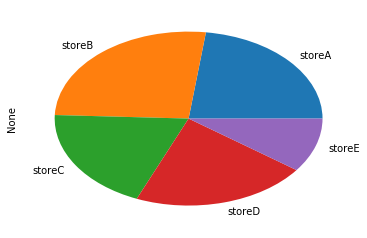

In [9]:
#要算平均销售额,用describe函数可以得出数据,若用可视化表现
df_s.mean().plot(kind ='pie');

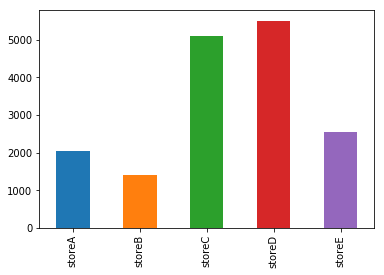

In [12]:
sales = df_s[df_s['week'] == '2016-03-13']
sales.iloc[0, 1:].plot(kind='bar');

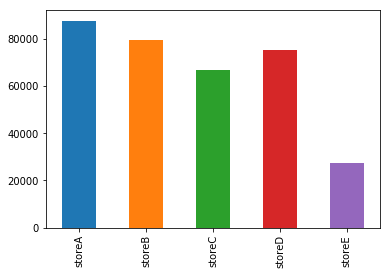

In [16]:
last_three_months = df_s[df_s['week'] >= '2017-12-01']
last_three_months.iloc[:, 1:].sum().plot(kind='bar');